In [0]:
from google.colab import files
uploaded = files.upload()

In [0]:
!unzip amexpert-2019.zip

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
train = pd.read_csv('train.csv')
train.head()

,id,campaign_id,coupon_id,customer_id,redemption_status
0,1,13,27,1053,0
1,2,13,116,48,0
2,6,9,635,205,0
3,7,13,644,1050,0
4,9,8,1017,1489,0


In [2]:
consumer_data = pd.read_csv('customer_demographics.csv')
consumer_data.head()

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,70+,Married,0,2,NaN,4
1,6,46-55,Married,0,2,NaN,5
2,7,26-35,NaN,0,3,1,3
3,8,26-35,NaN,0,4,2,6
4,10,46-55,Single,0,1,NaN,5


In [3]:
mapping = pd.read_csv('coupon_item_mapping.csv')
mapping.head()

,coupon_id,item_id
0,105,37
1,107,75
2,494,76
3,522,77
4,518,77


In [4]:
item = pd.read_csv('item_data.csv')
item.head()

,item_id,brand,brand_type,category
0,1,1,Established,Grocery
1,2,1,Established,Miscellaneous
2,3,56,Local,Bakery
3,4,56,Local,Grocery
4,5,56,Local,Grocery


In [5]:
transaction_data = pd.read_csv('customer_transaction_data.csv')
transaction_data.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0
3,2012-01-02,1501,33647,1,67.32,0.00,0.0
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0


In [6]:
campaign_data = pd.read_csv('campaign_data.csv')
campaign_data.head()

,campaign_id,campaign_type,start_date,end_date
0,24,Y,21/10/13,20/12/13
1,25,Y,21/10/13,22/11/13
2,20,Y,07/09/13,16/11/13
3,23,Y,08/10/13,15/11/13
4,21,Y,16/09/13,18/10/13


In [0]:
##### reading data done now will map data and create a single database

In [8]:
##### merging test with campaign_id
 result = pd.merge(campaign_data, train, on='campaign_id')
 result.head()

,campaign_id,campaign_type,start_date,end_date,id,coupon_id,customer_id,redemption_status
0,13,X,19/05/13,05/07/13,1,27,1053,0
1,13,X,19/05/13,05/07/13,2,116,48,0
2,13,X,19/05/13,05/07/13,7,644,1050,0
3,13,X,19/05/13,05/07/13,21,1028,89,0
4,13,X,19/05/13,05/07/13,23,517,1067,0


In [9]:
 #### merging result and consumer_data
 result1 = pd.merge(result, consumer_data, on='customer_id')
 result1.head()

,campaign_id,campaign_type,start_date,end_date,id,coupon_id,customer_id,redemption_status,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,13,X,19/05/13,05/07/13,1,27,1053,0,46-55,NaN,0,1,NaN,5
1,13,X,19/05/13,05/07/13,2444,513,1053,0,46-55,NaN,0,1,NaN,5
2,13,X,19/05/13,05/07/13,3651,166,1053,0,46-55,NaN,0,1,NaN,5
3,13,X,19/05/13,05/07/13,7712,766,1053,0,46-55,NaN,0,1,NaN,5
4,13,X,19/05/13,05/07/13,15317,165,1053,0,46-55,NaN,0,1,NaN,5


In [10]:
 result2 = pd.merge(result1,mapping, on='coupon_id')
 result2.head()

,campaign_id,campaign_type,start_date,end_date,id,coupon_id,customer_id,redemption_status,age_range,marital_status,rented,family_size,no_of_children,income_bracket,item_id
0,13,X,19/05/13,05/07/13,1,27,1053,0,46-55,NaN,0,1,NaN,5,24775
1,13,X,19/05/13,05/07/13,1,27,1053,0,46-55,NaN,0,1,NaN,5,14958
2,13,X,19/05/13,05/07/13,1,27,1053,0,46-55,NaN,0,1,NaN,5,40431
3,13,X,19/05/13,05/07/13,1,27,1053,0,46-55,NaN,0,1,NaN,5,20749
4,13,X,19/05/13,05/07/13,1,27,1053,0,46-55,NaN,0,1,NaN,5,56860


In [11]:
 result3 = pd.merge(result2,item, on='item_id')
 result3.head()

,campaign_id,campaign_type,start_date,end_date,id,coupon_id,customer_id,redemption_status,age_range,marital_status,rented,family_size,no_of_children,income_bracket,item_id,brand,brand_type,category
0,13,X,19/05/13,05/07/13,1,27,1053,0,46-55,NaN,0,1,NaN,5,24775,1636,Established,Grocery
1,13,X,19/05/13,05/07/13,111005,27,917,0,36-45,NaN,0,2,NaN,3,24775,1636,Established,Grocery
2,13,X,19/05/13,05/07/13,110468,27,861,0,70+,NaN,0,2,NaN,3,24775,1636,Established,Grocery
3,13,X,19/05/13,05/07/13,38206,27,888,0,26-35,Married,0,3,1,4,24775,1636,Established,Grocery
4,13,X,19/05/13,05/07/13,80182,27,745,0,36-45,NaN,0,1,NaN,1,24775,1636,Established,Grocery


In [12]:
result4 = pd.merge(result3,transaction_data, on=['item_id', 'customer_id'])
result4.head()

,campaign_id,campaign_type,start_date,end_date,id,coupon_id,customer_id,redemption_status,age_range,marital_status,rented,family_size,no_of_children,income_bracket,item_id,brand,brand_type,category,date,quantity,selling_price,other_discount,coupon_discount
0,13,X,19/05/13,05/07/13,97144,27,7,0,26-35,NaN,0,3,1,3,24775,1636,Established,Grocery,2012-06-07,1,78.72,-52.72,0.0
1,13,X,19/05/13,05/07/13,35142,27,541,0,26-35,Single,0,1,NaN,10,24775,1636,Established,Grocery,2013-02-02,1,89.05,-35.26,0.0
2,13,X,19/05/13,05/07/13,35142,27,541,0,26-35,Single,0,1,NaN,10,24775,1636,Established,Grocery,2013-02-07,1,89.05,-35.26,0.0
3,13,X,19/05/13,05/07/13,71225,22,541,0,26-35,Single,0,1,NaN,10,24775,1636,Established,Grocery,2013-02-02,1,89.05,-35.26,0.0
4,13,X,19/05/13,05/07/13,71225,22,541,0,26-35,Single,0,1,NaN,10,24775,1636,Established,Grocery,2013-02-07,1,89.05,-35.26,0.0


In [0]:
## combining data done and now we will handle the non-numeric data .

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


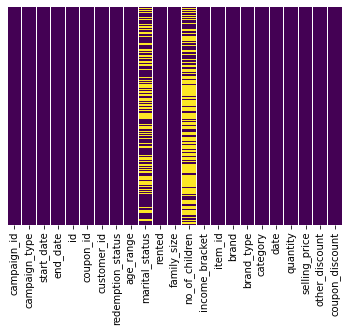

In [14]:
import seaborn as sns
sns.heatmap(result4.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [15]:
print(result4.shape)
print(result4.marital_status.isnull().sum())
print(result4.no_of_children.isnull().sum())

(94855, 23)
36296
60133


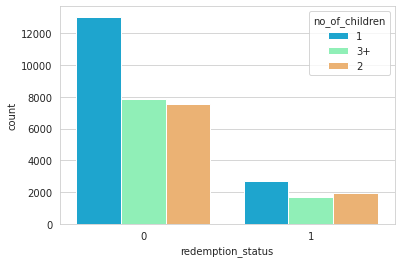

In [16]:
sns.set_style('whitegrid')
sns.countplot(x='redemption_status',hue='no_of_children',data=result4,palette='rainbow')


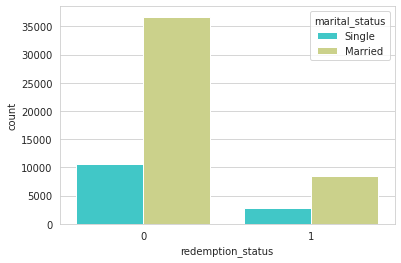

In [17]:
sns.set_style('whitegrid')
sns.countplot(x='redemption_status',hue='marital_status',data=result4,palette='rainbow')

In [0]:
### since the data in column no_of_children is about 1/3 it is better to delete that column . 
## And since the data in the the column marital status is 2/3 we will fit it using training set .

In [0]:
## converting each column to numric data .

In [20]:
result4 = result4.drop(['campaign_id','coupon_id','customer_id','item_id'],axis=1)
result4.head()

,campaign_type,start_date,end_date,id,redemption_status,age_range,marital_status,rented,family_size,no_of_children,income_bracket,brand,brand_type,category,date,quantity,selling_price,other_discount,coupon_discount
0,X,19/05/13,05/07/13,97144,0,26-35,NaN,0,3,1,3,1636,Established,Grocery,2012-06-07,1,78.72,-52.72,0.0
1,X,19/05/13,05/07/13,35142,0,26-35,Single,0,1,NaN,10,1636,Established,Grocery,2013-02-02,1,89.05,-35.26,0.0
2,X,19/05/13,05/07/13,35142,0,26-35,Single,0,1,NaN,10,1636,Established,Grocery,2013-02-07,1,89.05,-35.26,0.0
3,X,19/05/13,05/07/13,71225,0,26-35,Single,0,1,NaN,10,1636,Established,Grocery,2013-02-02,1,89.05,-35.26,0.0
4,X,19/05/13,05/07/13,71225,0,26-35,Single,0,1,NaN,10,1636,Established,Grocery,2013-02-07,1,89.05,-35.26,0.0


In [21]:
result4 = result4.drop(['id'],axis=1)
result4.head()

,campaign_type,start_date,end_date,redemption_status,age_range,marital_status,rented,family_size,no_of_children,income_bracket,brand,brand_type,category,date,quantity,selling_price,other_discount,coupon_discount
0,X,19/05/13,05/07/13,0,26-35,NaN,0,3,1,3,1636,Established,Grocery,2012-06-07,1,78.72,-52.72,0.0
1,X,19/05/13,05/07/13,0,26-35,Single,0,1,NaN,10,1636,Established,Grocery,2013-02-02,1,89.05,-35.26,0.0
2,X,19/05/13,05/07/13,0,26-35,Single,0,1,NaN,10,1636,Established,Grocery,2013-02-07,1,89.05,-35.26,0.0
3,X,19/05/13,05/07/13,0,26-35,Single,0,1,NaN,10,1636,Established,Grocery,2013-02-02,1,89.05,-35.26,0.0
4,X,19/05/13,05/07/13,0,26-35,Single,0,1,NaN,10,1636,Established,Grocery,2013-02-07,1,89.05,-35.26,0.0


In [22]:
result4.head()

,campaign_type,start_date,end_date,redemption_status,age_range,marital_status,rented,family_size,no_of_children,income_bracket,brand,brand_type,category,date,quantity,selling_price,other_discount,coupon_discount
0,X,19/05/13,05/07/13,0,26-35,NaN,0,3,1,3,1636,Established,Grocery,2012-06-07,1,78.72,-52.72,0.0
1,X,19/05/13,05/07/13,0,26-35,Single,0,1,NaN,10,1636,Established,Grocery,2013-02-02,1,89.05,-35.26,0.0
2,X,19/05/13,05/07/13,0,26-35,Single,0,1,NaN,10,1636,Established,Grocery,2013-02-07,1,89.05,-35.26,0.0
3,X,19/05/13,05/07/13,0,26-35,Single,0,1,NaN,10,1636,Established,Grocery,2013-02-02,1,89.05,-35.26,0.0
4,X,19/05/13,05/07/13,0,26-35,Single,0,1,NaN,10,1636,Established,Grocery,2013-02-07,1,89.05,-35.26,0.0


In [23]:
print(set(result4.campaign_type))
print(set(result4.age_range))
print(set(result4.rented))
print(set(result4.brand))
print(set(result4.brand_type))
print(set(result4.category))
print(set(result4.quantity))
print(set(result4.coupon_discount))
print(len(set(result4.brand)))
print(result4.age_range.isnull().sum())

{'Y', 'X'}
{'18-25', '56-70', '26-35', '36-45', '70+', '46-55'}
{0, 1}
{1, 4097, 4099, 4, 2053, 5, 4101, 8, 2054, 11, 2060, 4109, 4110, 4111, 16, 17, 4108, 4112, 2068, 4117, 4118, 23, 2072, 4119, 4121, 2069, 2074, 25, 2079, 4127, 33, 31, 35, 2083, 2084, 39, 2088, 40, 4138, 4139, 4140, 2090, 47, 2095, 2097, 2098, 4145, 2100, 53, 2101, 4149, 56, 57, 58, 4150, 4151, 4154, 4158, 63, 4155, 4161, 4153, 67, 2116, 2113, 4166, 2119, 4168, 4167, 4170, 71, 2125, 78, 79, 81, 4177, 83, 4179, 4181, 2134, 87, 4184, 89, 91, 4187, 4191, 4192, 4193, 4194, 101, 102, 4199, 4201, 4202, 105, 108, 2157, 4206, 2159, 4210, 115, 4212, 118, 119, 124, 4224, 4226, 2178, 132, 133, 4229, 4230, 2062, 2187, 4235, 140, 2190, 142, 141, 145, 2188, 147, 152, 155, 2205, 158, 4254, 4256, 162, 2212, 165, 167, 168, 2217, 4264, 172, 176, 2227, 2228, 4278, 183, 4279, 4281, 4284, 189, 4286, 190, 4288, 4296, 4297, 4298, 4299, 4300, 4301, 4302, 4303, 206, 4305, 4306, 4307, 4308, 4309, 4310, 209, 4312, 2259, 4314, 214, 220, 4317, 4

In [0]:
map_campaign_type= {'Y':0,'X':1}
map_age ={'56-70':4, '70+':5, '26-35':1, '46-55':3, '18-25':0, '36-45':2}
map_brand_type = {'Local':0, 'Established':1}
## One hot encoding for thee column on quantity and brand
## quantity and discount stays as it is

In [25]:
type1= result4
type1['brand'].value_counts()
##dummy = pd.get_dummies(type1['category'])
##dummy.head()


56      20885
1337     3586
278      2798
714      2529
158      2503
        ...  
2353        1
4149        1
2703        1
3383        1
4264        1
Name: brand, Length: 1281, dtype: int64

In [26]:
print(type1.category.value_counts().sort_values(ascending = False).head(10))
top10 = [x for x in type1.category.value_counts().sort_values(ascending = False).head(10).index]

Grocery                   61849
Pharmaceutical            12517
Packaged Meat              8242
Natural Products           6057
Meat                       2870
Dairy, Juices & Snacks     1415
Seafood                    1018
Skin & Hair Care            337
Flowers & Plants            164
Prepared Food               155
Name: category, dtype: int64


In [27]:
print(type1.brand.value_counts().sort_values(ascending = False).head(100))
top100 = [x for x in type1.brand.value_counts().sort_values(ascending = False).head(100).index]

56      20885
1337     3586
278      2798
714      2529
158      2503
        ...  
1041      137
501       134
1709      128
702       122
789       122
Name: brand, Length: 100, dtype: int64


In [28]:
for i in top10 :
    type1[i] = np.where(type1['category']==i,1,0)
type1[['category']+top10].head()

,category,Grocery,Pharmaceutical,Packaged Meat,Natural Products,Meat,"Dairy, Juices & Snacks",Seafood,Skin & Hair Care,Flowers & Plants,Prepared Food
0,Grocery,1,0,0,0,0,0,0,0,0,0
1,Grocery,1,0,0,0,0,0,0,0,0,0
2,Grocery,1,0,0,0,0,0,0,0,0,0
3,Grocery,1,0,0,0,0,0,0,0,0,0
4,Grocery,1,0,0,0,0,0,0,0,0,0


In [29]:
for i in top100 :
    type1[i] = np.where(type1['brand']==i,1,0)
type1[['brand']+top100].head()

,brand,56,1337,278,714,158,1149,686,1101,681,209,946,172,602,487,1075,133,1,989,967,544,1105,412,984,350,864,1124,1898,1134,676,1487,387,673,461,1636,782,1278,119,1558,939,...,971,1475,777,1689,1183,1367,1953,498,1954,241,4790,152,914,1294,2025,2011,522,58,79,644,1276,908,1088,582,1274,1061,1000,1665,1555,1796,595,1016,1358,1393,1308,1041,501,1709,702,789
0,1636,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1636,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1636,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1636,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1636,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
type1.head()

,campaign_type,start_date,end_date,redemption_status,age_range,marital_status,rented,family_size,no_of_children,income_bracket,brand,brand_type,category,date,quantity,selling_price,other_discount,coupon_discount,Grocery,Pharmaceutical,Packaged Meat,Natural Products,Meat,"Dairy, Juices & Snacks",Seafood,Skin & Hair Care,Flowers & Plants,Prepared Food,56,1337,278,714,158,1149,686,1101,681,209,946,172,...,971,1475,777,1689,1183,1367,1953,498,1954,241,4790,152,914,1294,2025,2011,522,58,79,644,1276,908,1088,582,1274,1061,1000,1665,1555,1796,595,1016,1358,1393,1308,1041,501,1709,702,789
0,X,19/05/13,05/07/13,0,26-35,NaN,0,3,1,3,1636,Established,Grocery,2012-06-07,1,78.72,-52.72,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,X,19/05/13,05/07/13,0,26-35,Single,0,1,NaN,10,1636,Established,Grocery,2013-02-02,1,89.05,-35.26,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,X,19/05/13,05/07/13,0,26-35,Single,0,1,NaN,10,1636,Established,Grocery,2013-02-07,1,89.05,-35.26,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,X,19/05/13,05/07/13,0,26-35,Single,0,1,NaN,10,1636,Established,Grocery,2013-02-02,1,89.05,-35.26,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,X,19/05/13,05/07/13,0,26-35,Single,0,1,NaN,10,1636,Established,Grocery,2013-02-07,1,89.05,-35.26,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [31]:
type1 = type1.replace({'campaign_type':map_campaign_type})
type1 = type1.replace({'age_range' :map_age})
type1 = type1.replace({'brand_type':map_brand_type})
type1.head()


,campaign_type,start_date,end_date,redemption_status,age_range,marital_status,rented,family_size,no_of_children,income_bracket,brand,brand_type,category,date,quantity,selling_price,other_discount,coupon_discount,Grocery,Pharmaceutical,Packaged Meat,Natural Products,Meat,"Dairy, Juices & Snacks",Seafood,Skin & Hair Care,Flowers & Plants,Prepared Food,56,1337,278,714,158,1149,686,1101,681,209,946,172,...,971,1475,777,1689,1183,1367,1953,498,1954,241,4790,152,914,1294,2025,2011,522,58,79,644,1276,908,1088,582,1274,1061,1000,1665,1555,1796,595,1016,1358,1393,1308,1041,501,1709,702,789
0,1,19/05/13,05/07/13,0,1,NaN,0,3,1,3,1636,1,Grocery,2012-06-07,1,78.72,-52.72,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,19/05/13,05/07/13,0,1,Single,0,1,NaN,10,1636,1,Grocery,2013-02-02,1,89.05,-35.26,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,19/05/13,05/07/13,0,1,Single,0,1,NaN,10,1636,1,Grocery,2013-02-07,1,89.05,-35.26,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,19/05/13,05/07/13,0,1,Single,0,1,NaN,10,1636,1,Grocery,2013-02-02,1,89.05,-35.26,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,19/05/13,05/07/13,0,1,Single,0,1,NaN,10,1636,1,Grocery,2013-02-07,1,89.05,-35.26,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
import datetime
x = pd.to_datetime(type1['start_date'])
print(x)

0       2013-05-19
1       2013-05-19
2       2013-05-19
3       2013-05-19
4       2013-05-19
           ...    
94850   2012-11-19
94851   2012-11-19
94852   2012-11-19
94853   2012-11-19
94854   2012-11-19
Name: start_date, Length: 94855, dtype: datetime64[ns]


In [33]:
y = pd.to_datetime(type1['end_date'])
print(y)

0       2013-05-07
1       2013-05-07
2       2013-05-07
3       2013-05-07
4       2013-05-07
           ...    
94850   2013-04-01
94851   2013-04-01
94852   2013-04-01
94853   2013-04-01
94854   2013-04-01
Name: end_date, Length: 94855, dtype: datetime64[ns]


In [34]:
type1.head()

,campaign_type,start_date,end_date,redemption_status,age_range,marital_status,rented,family_size,no_of_children,income_bracket,brand,brand_type,category,date,quantity,selling_price,other_discount,coupon_discount,Grocery,Pharmaceutical,Packaged Meat,Natural Products,Meat,"Dairy, Juices & Snacks",Seafood,Skin & Hair Care,Flowers & Plants,Prepared Food,56,1337,278,714,158,1149,686,1101,681,209,946,172,...,971,1475,777,1689,1183,1367,1953,498,1954,241,4790,152,914,1294,2025,2011,522,58,79,644,1276,908,1088,582,1274,1061,1000,1665,1555,1796,595,1016,1358,1393,1308,1041,501,1709,702,789
0,1,19/05/13,05/07/13,0,1,NaN,0,3,1,3,1636,1,Grocery,2012-06-07,1,78.72,-52.72,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,19/05/13,05/07/13,0,1,Single,0,1,NaN,10,1636,1,Grocery,2013-02-02,1,89.05,-35.26,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,19/05/13,05/07/13,0,1,Single,0,1,NaN,10,1636,1,Grocery,2013-02-07,1,89.05,-35.26,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,19/05/13,05/07/13,0,1,Single,0,1,NaN,10,1636,1,Grocery,2013-02-02,1,89.05,-35.26,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,19/05/13,05/07/13,0,1,Single,0,1,NaN,10,1636,1,Grocery,2013-02-07,1,89.05,-35.26,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
type1 = type1.drop(['start_date','end_date','date','no_of_children'],axis=1)
type1.head()

,campaign_type,redemption_status,age_range,marital_status,rented,family_size,income_bracket,brand,brand_type,category,quantity,selling_price,other_discount,coupon_discount,Grocery,Pharmaceutical,Packaged Meat,Natural Products,Meat,"Dairy, Juices & Snacks",Seafood,Skin & Hair Care,Flowers & Plants,Prepared Food,56,1337,278,714,158,1149,686,1101,681,209,946,172,602,487,1075,133,...,971,1475,777,1689,1183,1367,1953,498,1954,241,4790,152,914,1294,2025,2011,522,58,79,644,1276,908,1088,582,1274,1061,1000,1665,1555,1796,595,1016,1358,1393,1308,1041,501,1709,702,789
0,1,0,1,NaN,0,3,3,1636,1,Grocery,1,78.72,-52.72,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,Single,0,1,10,1636,1,Grocery,1,89.05,-35.26,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,1,Single,0,1,10,1636,1,Grocery,1,89.05,-35.26,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,Single,0,1,10,1636,1,Grocery,1,89.05,-35.26,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,1,Single,0,1,10,1636,1,Grocery,1,89.05,-35.26,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [36]:
type1 = type1.drop(['category','brand'],axis =1)
type1.head()

,campaign_type,redemption_status,age_range,marital_status,rented,family_size,income_bracket,brand_type,quantity,selling_price,other_discount,coupon_discount,Grocery,Pharmaceutical,Packaged Meat,Natural Products,Meat,"Dairy, Juices & Snacks",Seafood,Skin & Hair Care,Flowers & Plants,Prepared Food,56,1337,278,714,158,1149,686,1101,681,209,946,172,602,487,1075,133,1,989,...,971,1475,777,1689,1183,1367,1953,498,1954,241,4790,152,914,1294,2025,2011,522,58,79,644,1276,908,1088,582,1274,1061,1000,1665,1555,1796,595,1016,1358,1393,1308,1041,501,1709,702,789
0,1,0,1,NaN,0,3,3,1,1,78.72,-52.72,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,Single,0,1,10,1,1,89.05,-35.26,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,1,Single,0,1,10,1,1,89.05,-35.26,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,Single,0,1,10,1,1,89.05,-35.26,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,1,Single,0,1,10,1,1,89.05,-35.26,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [37]:
type1 = type1.drop(['marital_status'],axis =1 )
type1.head()


,campaign_type,redemption_status,age_range,rented,family_size,income_bracket,brand_type,quantity,selling_price,other_discount,coupon_discount,Grocery,Pharmaceutical,Packaged Meat,Natural Products,Meat,"Dairy, Juices & Snacks",Seafood,Skin & Hair Care,Flowers & Plants,Prepared Food,56,1337,278,714,158,1149,686,1101,681,209,946,172,602,487,1075,133,1,989,967,...,971,1475,777,1689,1183,1367,1953,498,1954,241,4790,152,914,1294,2025,2011,522,58,79,644,1276,908,1088,582,1274,1061,1000,1665,1555,1796,595,1016,1358,1393,1308,1041,501,1709,702,789
0,1,0,1,0,3,3,1,1,78.72,-52.72,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,1,10,1,1,89.05,-35.26,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,1,10,1,1,89.05,-35.26,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,1,10,1,1,89.05,-35.26,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,1,10,1,1,89.05,-35.26,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
X = type1
y = type1['redemption_status']
X = X.drop(['redemption_status'],axis = 1)
map_family = {'1':1, '2':2, '3':3, '4':4, '5+':5}
X = X.replace({'family_size' :map_family})

In [39]:
set(X.family_size)

{1, 2, 3, 4, 5}

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as pyplot

0.7871946455869492


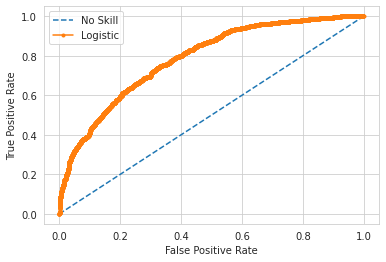

In [50]:
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.2, random_state=2)
ns_probs = [0 for _ in range(len(testy))]
model = LogisticRegression(solver='lbfgs',max_iter=2500)
model.fit(trainX, trainy)
lr_probs = model.predict_proba(testX)
lr_probs = lr_probs[:, 1]
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
print(lr_auc)
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
